<a href="https://colab.research.google.com/github/wiz124/chem169-git/blob/main/Li_Harry_M3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Exercise 1
#!pip install rdkit
import pandas as pd
import rdkit
from rdkit import Chem

df=pd.read_csv('FDA_Approved_structures.csv')
invalid_mol=[]
valid_mol=[]
for smiles in df['SMILES']:
  mol=Chem.MolFromSmiles(smiles)
  if mol is None:
    print('Invalid SMILES')
    invalid_mol.append(smiles)
    df.drop(df[df['SMILES']==smiles].index,inplace=True)
  else:
    try:
      Chem.SanitizeMol(mol)
      valid_mol.append(mol)
    except:
      mol = None
      invalid_mol.append(smiles)
      df.drop(df[df['SMILES']==smiles].index,inplace=True)
    df.loc[df['SMILES']==smiles,'RDkit_Mol']=mol


print(f'Total number of valid molecules: {len(valid_mol)}')
print(f'Total number of invalid molecules:  {len(invalid_mol)}')
display(df)

[01:32:24] Explicit valence for atom # 84 N, 4, is greater than permitted


Invalid SMILES


[01:32:27] WARNING: not removing hydrogen atom without neighbors
[01:32:27] WARNING: not removing hydrogen atom without neighbors
[01:32:27] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[01:32:27] SMILES Parse Error: check for mistakes around position 76:
[01:32:27] C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C
[01:32:27] ~~~~~~~~~~~~~~~~~~~~^
[01:32:27] SMILES Parse Error: extra open parentheses while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[01:32:27] SMILES Parse Error: check for mistakes around position 32:
[01:32:27] C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2
[01:32:27] ~~~~~~~~~~~~~~~~~~~~^
[01:32:27] SMILES Parse Error: extra open parentheses while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1

Invalid SMILES
Total number of valid molecules: 2582
Total number of invalid molecules:  2


,Name,SMILES,RDkit_Mol
0,"1,2-Benzodiazepine",N1N=CC=CC2=CC=CC=C12,<rdkit.Chem.rdchem.Mol object at 0x7e018ee5fa70>
1,"1,2-Distearoyllecithin",CCCCCCCCCCCCCCCCCC(=O)OCC(COP([O-])(=O)OCC[N+]...,<rdkit.Chem.rdchem.Mol object at 0x7e018ee5fae0>
2,"1,2-icosapentoyl-sn-glycero-3-phosphoserine",[H]C(N)(COP(O)(=O)OCC([H])(COC(=O)CCC\C=C/C\C=...,<rdkit.Chem.rdchem.Mol object at 0x7e018ee5fb50>
3,1-Palmitoyl-2-oleoyl-sn-glycero-3-(phospho-rac...,CCCCCCCCCCCCCCCC(=O)OC[C@H](COP(O)(=O)OCC(O)CO...,<rdkit.Chem.rdchem.Mol object at 0x7e018ee5fbc0>
4,"2,2'-Dibenzothiazyl disulfide",S(SC1=NC2=CC=CC=C2S1)C1=NC2=CC=CC=C2S1,<rdkit.Chem.rdchem.Mol object at 0x7e018ee5fc30>
...,...,...,...
2579,Zopiclone,CN1CCN(CC1)C(=O)OC1N(C(=O)C2=NC=CN=C12)C1=NC=C...,<rdkit.Chem.rdchem.Mol object at 0x7e018ebfec70>
2580,Zotepine,CN(C)CCOC1=CC2=CC=CC=C2SC2=CC=C(Cl)C=C12,<rdkit.Chem.rdchem.Mol object at 0x7e018ebfece0>
2581,Zucapsaicin,COC1=C(O)C=CC(CNC(=O)CCCC\C=C/C(C)C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7e018ebfed50>
2582,Zuclopenthixol,OCCN1CCN(CC\C=C2\C3=C(SC4=C2C=C(Cl)C=C4)C=CC=C...,<rdkit.Chem.rdchem.Mol object at 0x7e018ebfedc0>


In [ ]:

#Exercise 2
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import rdBase

pos={}

def fingerprint(valid_mol):
  global pos
  fingerprints={}
  radius=2
  morgan_fps=[]
  bit_infos=[]

  for idx, mol in enumerate(valid_mol):
    bit_info={}
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=1024, bitInfo=bit_info)
    morgan_fps.append(fp)
    bit_infos.append(bit_info)
    fingerprints['fps']=morgan_fps
    fingerprints['bit_info']=bit_infos
    if fp not in pos:
      pos[fp]=idx

  return fingerprints

with rdBase.BlockLogs():
  fingerprints=fingerprint(valid_mol)
pass


assert len(valid_mol)==len(fingerprints['fps'])
print('every valid mol has fingerprint')
assert len(valid_mol)==len(fingerprints['bit_info'])
print('every valid mol has bit info')

print(fingerprints['fps'][df[df['Name'] == '1,2-Benzodiazepine'].index[0]])
print(fingerprints['fps'])

every valid mol has fingerprint
every valid mol has bit info
[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc83489ee0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a0a0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc83489fc0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a260>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a2d0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a340>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a3b0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a420>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a490>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a500>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a570>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x79dc8348a5e0>, <rdkit.DataStructs.cDataStructs.Explic

aspirin: 


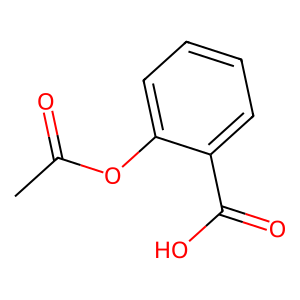

caffeine: 


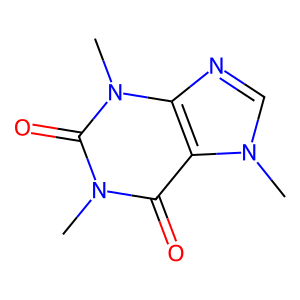

metformin: 


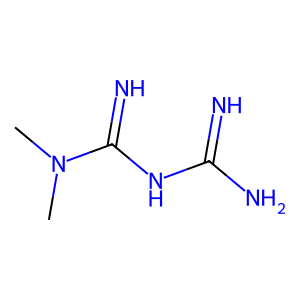

ibuprofen: 


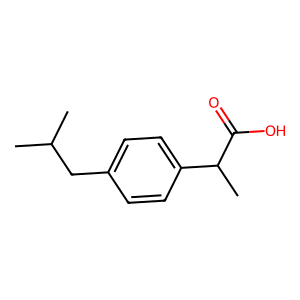

In [34]:
#Exercise 3
from rdkit.Chem import Draw
def smiletomol(smile):
  mol=Chem.MolFromSmiles(smile)
  return mol

aspirin_smiles='CC(=O)OC1=CC=CC=C1C(=O)O'
caffeine_smiles='CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
metformin_smiles='CN(C)C(=N)NC(=N)N'
ibuprofen_smiles='CC(C)CC1=CC=C(C=C1)C(C)C(=O)O'
drug_query={}

drug_query['aspirin']=[smiletomol(aspirin_smiles)]
drug_query['caffeine']=[smiletomol(caffeine_smiles)]
drug_query['metformin']=[smiletomol(metformin_smiles)]
drug_query['ibuprofen']=[smiletomol(ibuprofen_smiles)]

img_list=[]
for key,value in drug_query.items():
  print(f'{key}: ')
  display(Draw.MolToImage(value[0]))

try:
  for key,value in drug_query.items():
    with rdBase.BlockLogs():
      query_fingerprint=fingerprint(value)
    pass
    drug_query[key].append(query_fingerprint)
except:
  print('Unable to process all mols/fingerprints')



In [35]:
#Exercise 4
from rdkit import DataStructs
import numpy as np
import heapq

def compute_similarity_matrix(drug_fps, reference_fps):
     n = len(drug_fps) # n should just equal 1
     m = len(reference_fps)
     similarity_dict = {}
     for i in range(n):
        for j in range(m):
            similarity_dict[j] = DataStructs.TanimotoSimilarity(drug_fps[i], reference_fps[j])


     return similarity_dict

def getDrugName(df,idx):
  return df.loc[idx, "Name"]

similarity_matrices = {}


tables=[]
for drug, fp_data in drug_query.items():
      sim_dict=compute_similarity_matrix(fp_data[1]['fps'],fingerprints['fps'])
      similarity_matrices[drug] = heapq.nlargest(10,sim_dict.items(), key=lambda item: item[1])

      similarity_matrices[drug]=dict(similarity_matrices[drug])
      create_df={'Query Name':[],'Drug Name':[],'Similarity Score':[]}

      for idx, score in similarity_matrices[drug].items():
      # for fps,score in similarity_matrices[drug].items():
        create_df['Drug Name'].append(getDrugName(df,idx))
        create_df['Query Name'].append(drug)
        create_df['Similarity Score'].append(score)
      tables.append(create_df)
      display(pd.DataFrame(create_df))





,Query Name,Drug Name,Similarity Score
0,aspirin,Acetylsalicylic acid,1.000000
1,aspirin,Salmeterol,0.612903
2,aspirin,Triflupromazine,0.527778
3,aspirin,Benorilate,0.526316
4,aspirin,Salicylamide,0.464286
5,aspirin,D-glucose,0.418605
6,aspirin,Nisoldipine,0.416667
7,aspirin,Phenyl aminosalicylate,0.382353
8,aspirin,Resorcinol,0.371429
9,aspirin,Methyl nicotinate,0.363636


,Query Name,Drug Name,Similarity Score
0,caffeine,Caffeine,1.000000
1,caffeine,Pentostatin,0.538462
2,caffeine,Dydrogesterone,0.512821
3,caffeine,Thenalidine,0.470588
4,caffeine,Warfarin,0.425532
5,caffeine,Aminophylline,0.410256
6,caffeine,Bromotheophylline,0.378378
7,caffeine,Oxprenolol,0.355556
8,caffeine,Temocillin,0.279070
9,caffeine,Dimazole,0.233333


,Query Name,Drug Name,Similarity Score
0,metformin,Metergoline,1.000000
1,metformin,Biguanide,0.500000
2,metformin,Creatine,0.285714
3,metformin,Guanfacine,0.277778
4,metformin,Pheneticillin,0.257143
5,metformin,Guanethidine,0.250000
6,metformin,Amiloride,0.243243
7,metformin,Guanidine,0.200000
8,metformin,Tetraferric tricitrate decahydrate,0.200000
9,metformin,Thiotepa,0.200000


,Query Name,Drug Name,Similarity Score
0,ibuprofen,Dexfenfluramine,1.000000
1,ibuprofen,Ibrutinib,1.000000
2,ibuprofen,Loxapine,0.487805
3,ibuprofen,Sunitinib,0.461538
4,ibuprofen,Naphazoline,0.421053
5,ibuprofen,Flurazepam,0.400000
6,ibuprofen,Tucatinib,0.400000
7,ibuprofen,Dexibuprofen,0.394737
8,ibuprofen,Ketoconazole,0.394737
9,ibuprofen,Fenoldopam,0.384615


Exercise 5

Aspirin Query Analysis:
The top hit for aspirin was acetylsalicylic acid, which is just aspirin itself, so that result is expected. Other hits such as benorilate and salicylamide are = related to salicylate chemistry and function as analgesics or anti-inflammatory drugs. These compounds share the salicylic acid motif or are similar in structure. This supports the idea that similar structure corresponds to similar functions. What surprised me was salmeterol and triflupromazine. Although they may share similar features such as aromatic rings or heteroatoms, their drug targets and therapeutic uses are completely different. This demonstrates that fingerprint similarity can reflect shared structural motifs without guaranteeing shared pharmacological function.

Caffeine Query Analysis:
For caffeine, the top hit was caffeine itself, which validates the similarity approach. However, the remaining hits were much more diverse compared to aspirin. Pentostatin is a chemotherapy agent, dydrogesterone is a synthetic hormone, thenalidine is an analgesic, and warfarin is an anticoagulant. Despite structural similarities, these drugs act on entirely different biological pathways. Caffeine is a central nervous system stimulant and adenosine receptor antagonist, whereas the other hits have unrelated mechanisms of action. This suggests that biological function can diverge significantly despite similar structures.

Exercise 6

The results show that structural similarity often correlates with similar function, especially when the core features are preserved, as seen with aspirin and other salicylates. However, the caffeine results illustrate that fingerprint similarity does not always imply shared therapeutic effects. Structural similarity increases the likelihood of functional similarity, but it is not a guarantee.

Fingerprints capture 2D substructural similarity but do not account for receptor selectivity, stereochemistry, or pharmacokinetics. As a result, molecules can appear similar computationally while acting on entirely different biological targets.

[LOGBOOK]

One thing that was confusing was trying to handle all the different references to memory and streamlining index positions. I used ChatGPT to help debug my code and explain any potential errors that my code produced. This allowed me to go look at my code and fix according to where ChatGPT said I should fix my code. One thing that I learned about from working with real data is learning how to manipulate data from data frames as well nested dictionaries and lists. This can be seen by the way I used such techniques to organize my data outside of a dataframe.